<a href="https://colab.research.google.com/github/Priyankasiddi89/Sales-Prediction/blob/main/sales_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df=pd.read_csv('/advertising.csv')
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [ ]:
df.shape

(200, 4)

In [ ]:
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.express as px
df.dtypes

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

In [ ]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

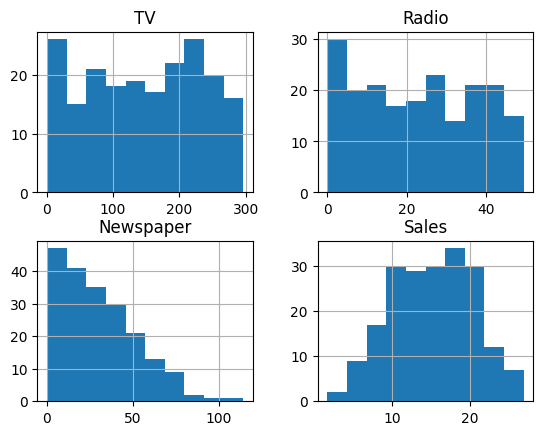

In [ ]:
df.hist()
plt.rcParams['figure.figsize']=[40,30];
plt.show()

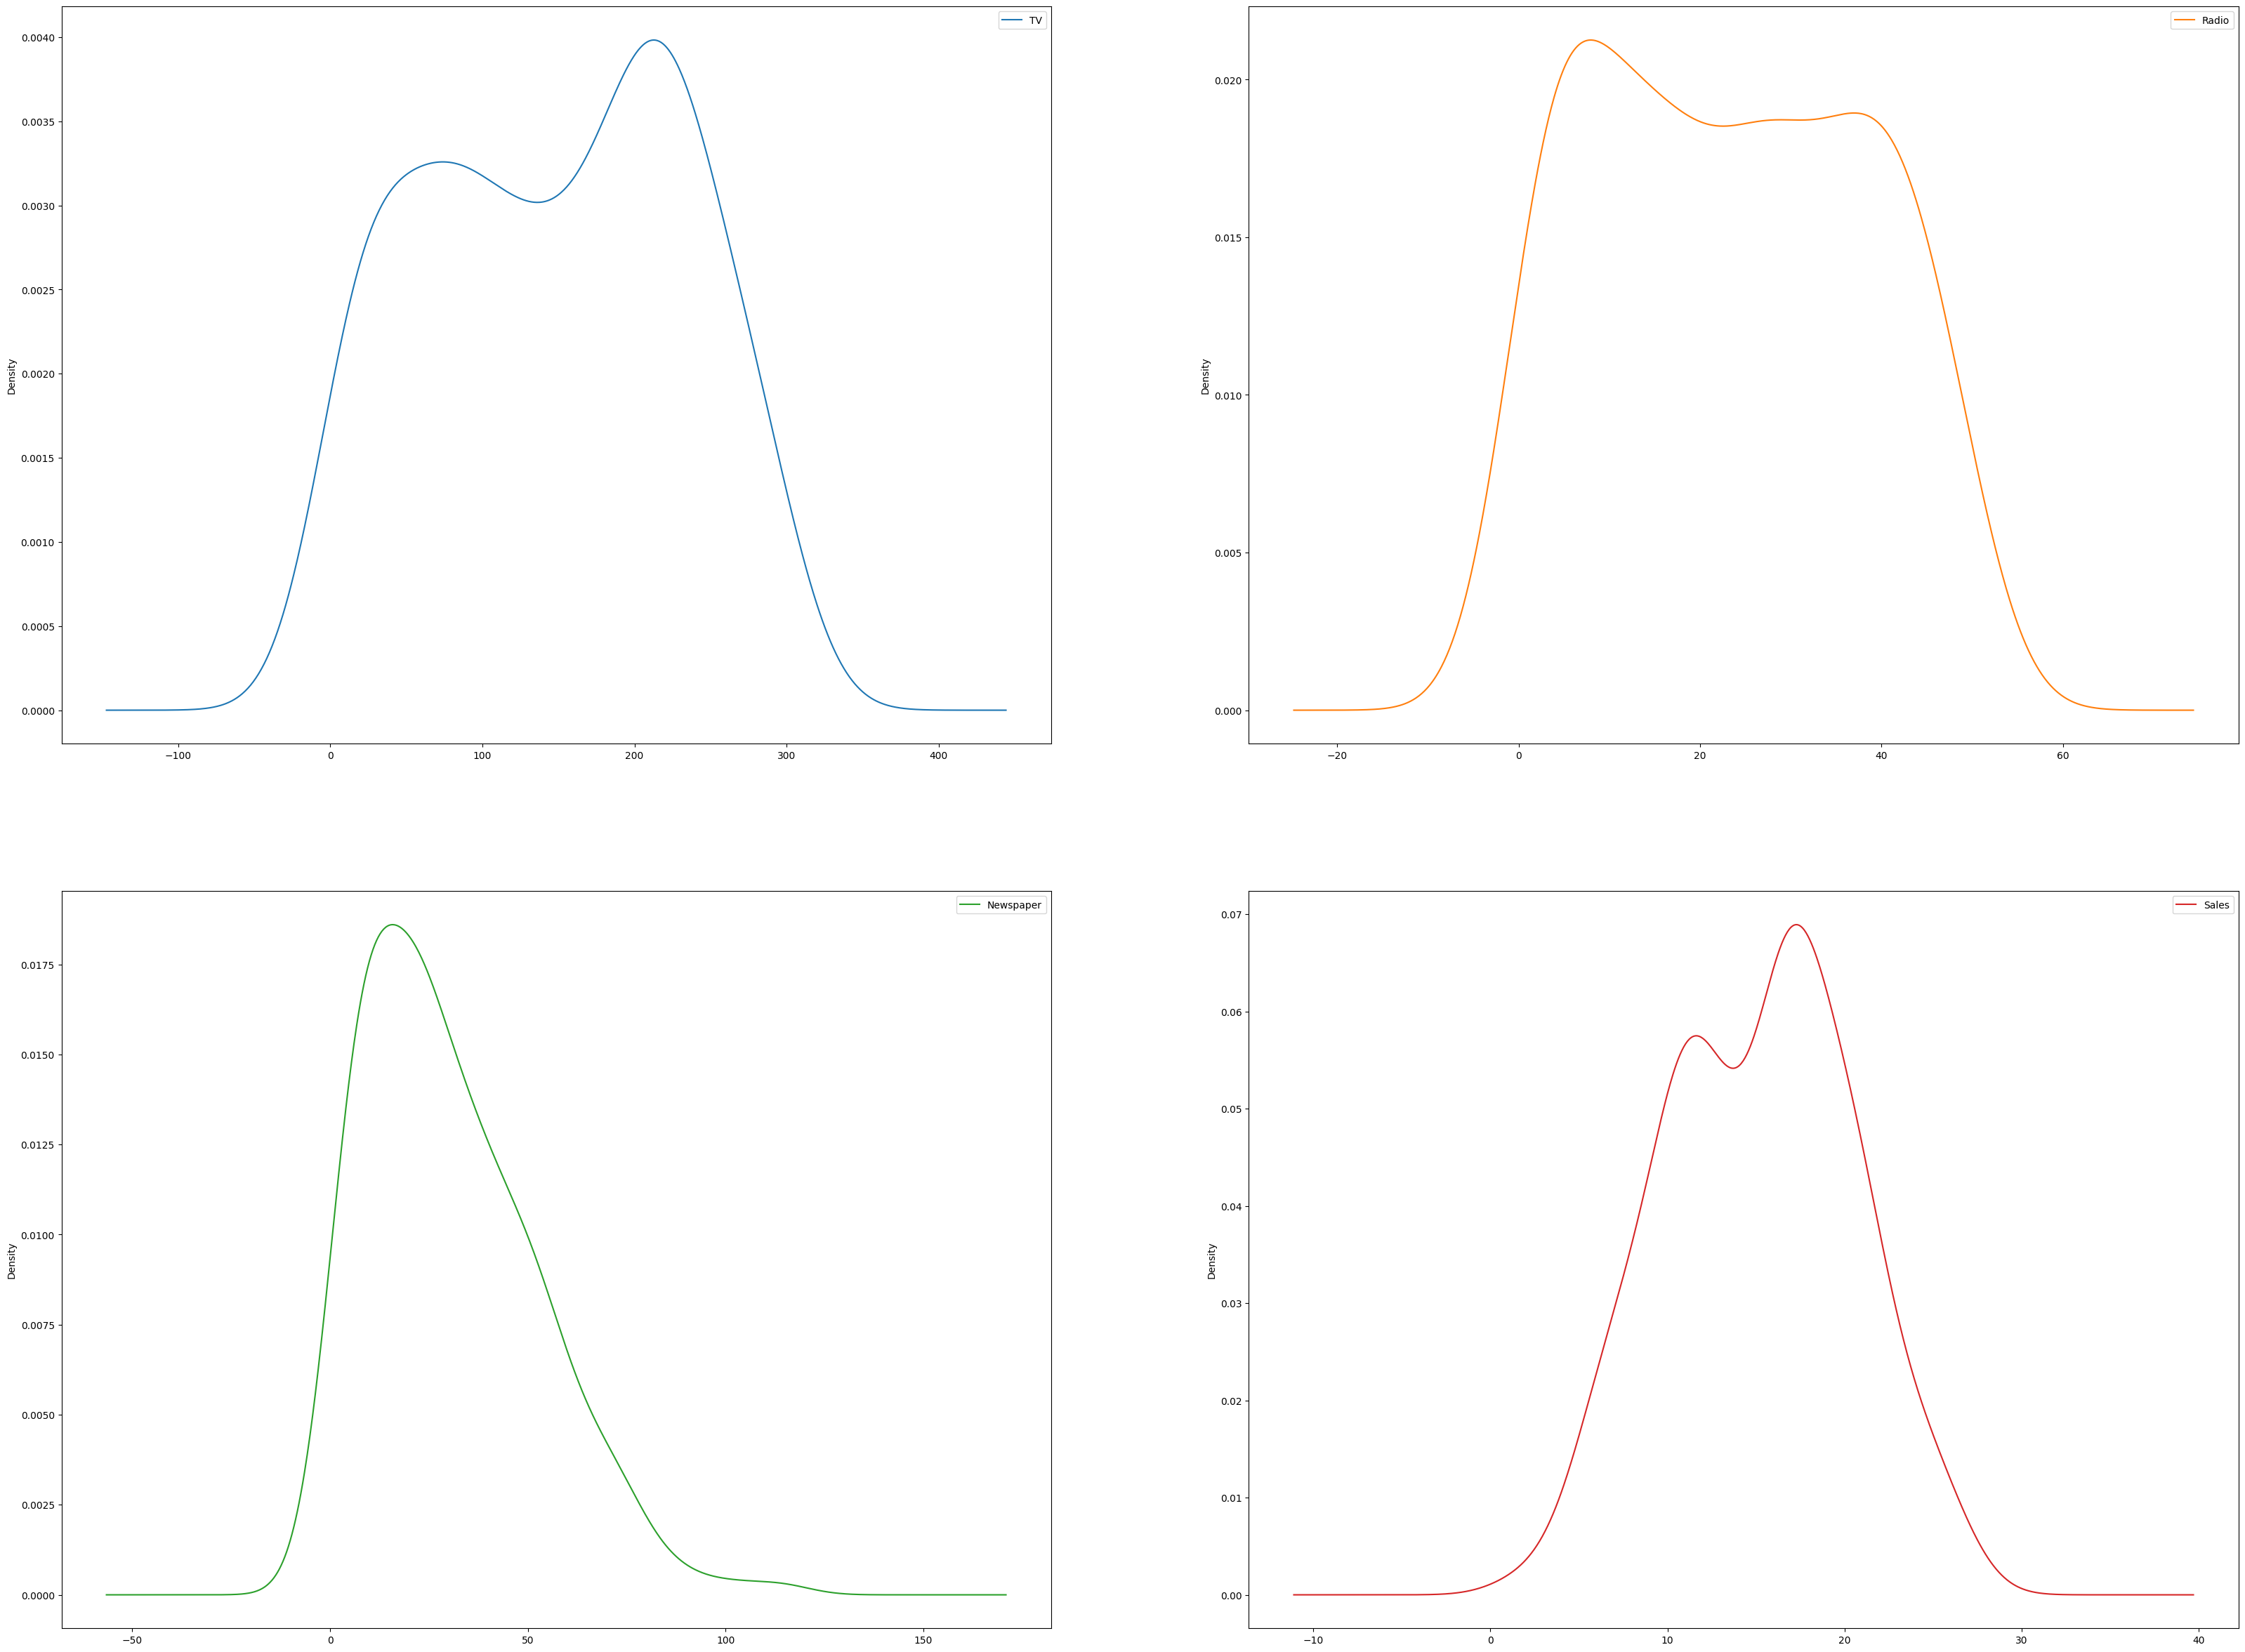

In [ ]:
df.plot(kind='density', subplots=True, layout=(2,2), sharex=False)
plt.show()

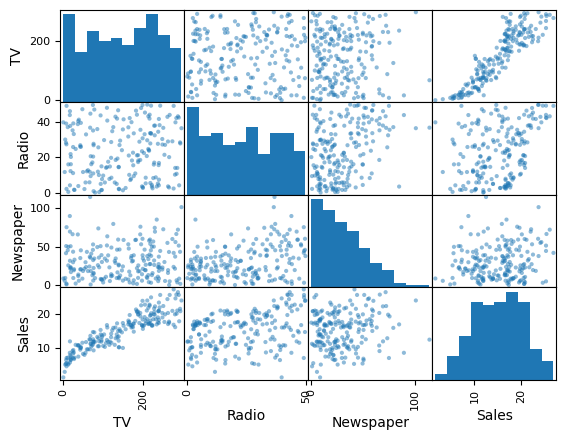

In [ ]:
from pandas.plotting import scatter_matrix
scatter_matrix(df)
plt.show()

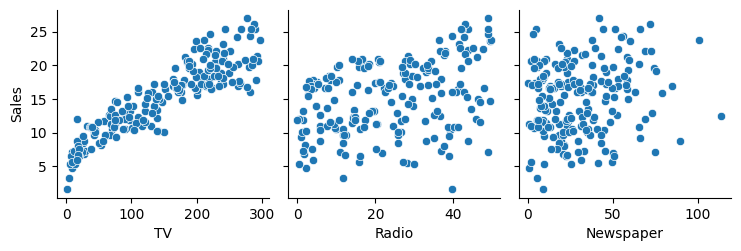

In [ ]:
import seaborn as sns
sns.pairplot(df,x_vars=['TV','Radio','Newspaper'],y_vars=['Sales'],kind='scatter')

In [ ]:
corr=df.corr()
corr

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


In [ ]:
Q1=df["Newspaper"].quantile(0.25)
Q3=df["Newspaper"].quantile(0.75)
IQR=Q3-Q1
upper_fence_newsp=Q3+1.5*IQR
contrarian=df["Newspaper"]>upper_fence_newsp
df.loc[contrarian,"Newspaper"]=upper_fence_newsp


In [ ]:
Q1=df["TV"].quantile(0.25)
Q3=df["TV"].quantile(0.75)
IQR=Q3-Q1
upper_fence_tv=Q3+1.5*IQR
contrarian=df["TV"]>upper_fence_tv
df.loc[contrarian,"TV"]=upper_fence_tv
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [ ]:
Q1=df["Radio"].quantile(0.25)
Q3=df["Radio"].quantile(0.75)
IQR=Q3-Q1
upper_fence_rad=Q3+1.5*IQR
contrarian=df["Radio"]>upper_fence_rad
df.loc[contrarian,"Radio"]=upper_fence_rad


In [ ]:
array = df.values
X=array[:,0:3]
Y=array[:,3]
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33,random_state=7)
print("X_train",X_train.shape)
print("X_test",X_test.shape)
print("Y_train",Y_train.shape)
print("Y_test",Y_test.shape)


X_train (134, 3)
X_test (66, 3)
Y_train (134,)
Y_test (66,)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
model=LinearRegression()
kfold = KFold(n_splits=10, random_state=7,shuffle=True)
#results = cross_val_score(model, X, Y, cv=kfold)
model.fit(X_train,Y_train)
print(model.coef_)

[0.05440154 0.1006007  0.00520697]


In [ ]:

predicted = model.predict(X_test)
from sklearn.metrics import precision_score
from sklearn.metrics import r2_score 
r2_score = r2_score(Y_test, predicted)
print("R2 Score:", r2_score)

R2 Score: 0.9097765040738608
